# Customer Churn Prevention 

[PLAN](../docs/churn.md)

Churn may depend on multiple parameters

Task: what to propose to user? Possible support

Satisfaction score -> utility

Clusterize users into targeted groups (suseptable to risk?)

*Target_Churn*: Indicates whether the customer churned (True or False).

tasks:
- validate
- compare to ml (svm?)
- 

## EDA section

In [15]:
# imports section
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("../resources/churn.csv") 
print(f'num of rows: {len(df)}')

print(df.iloc[1]) # display second row

header_dict = {col: idx for idx, col in enumerate(df.columns)} 
print(header_dict) # 'index': 0

inverted_header_dict = {value: key for key, value in header_dict.items()}
print(inverted_header_dict) # 0: 'index'

df.head(10)

num of rows: 1000
Customer_ID                           2
Age                                  65
Gender                             Male
Annual_Income                     79.51
Total_Spend                     9025.47
Years_as_Customer                    13
Num_of_Purchases                     77
Average_Transaction_Amount         22.9
Num_of_Returns                        2
Num_of_Support_Contacts               2
Satisfaction_Score                    3
Last_Purchase_Days_Ago              227
Email_Opt_In                      False
Promotion_Response            Responded
Target_Churn                      False
Name: 1, dtype: object
{'Customer_ID': 0, 'Age': 1, 'Gender': 2, 'Annual_Income': 3, 'Total_Spend': 4, 'Years_as_Customer': 5, 'Num_of_Purchases': 6, 'Average_Transaction_Amount': 7, 'Num_of_Returns': 8, 'Num_of_Support_Contacts': 9, 'Satisfaction_Score': 10, 'Last_Purchase_Days_Ago': 11, 'Email_Opt_In': 12, 'Promotion_Response': 13, 'Target_Churn': 14}
{0: 'Customer_ID', 1: 'Age

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
5,6,57,Male,190.43,255.19,19,85,417.78,5,1,4,130,False,Unsubscribed,False
6,7,27,Male,172.13,3512.55,3,77,316.18,0,3,1,61,True,Unsubscribed,False
7,8,37,Other,88.90,7270.90,4,87,63.61,3,4,3,224,False,Ignored,False
8,9,39,Other,24.46,4935.49,1,21,173.80,9,2,4,126,True,Responded,True
9,10,68,Other,169.59,9803.57,17,34,481.18,6,1,2,171,True,Unsubscribed,False


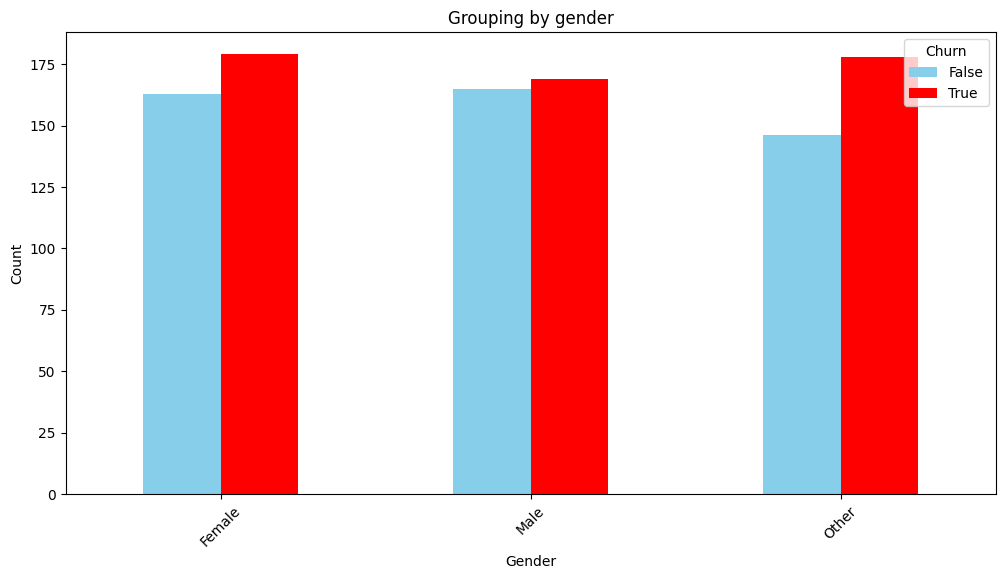

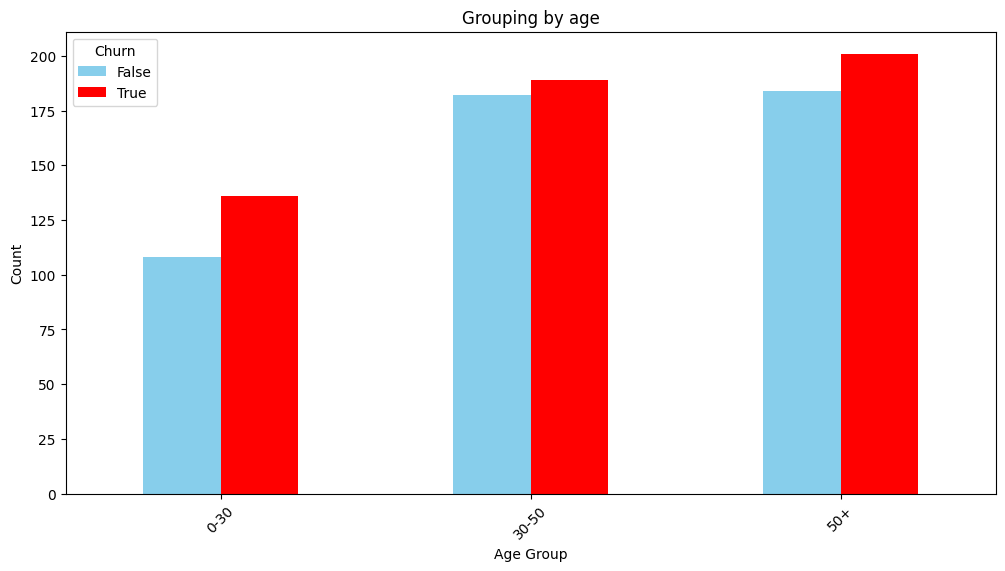

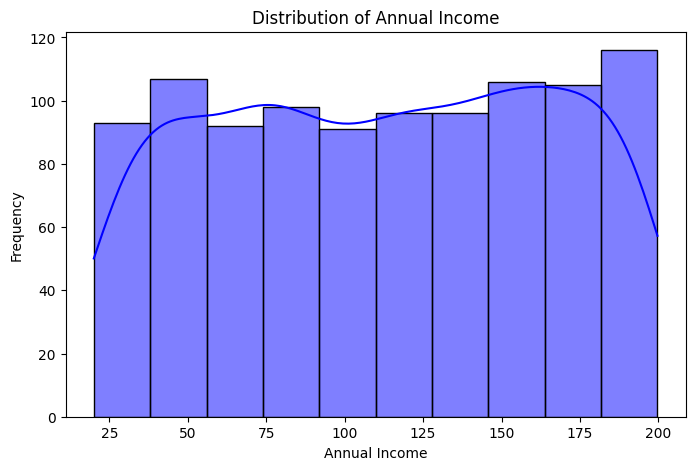

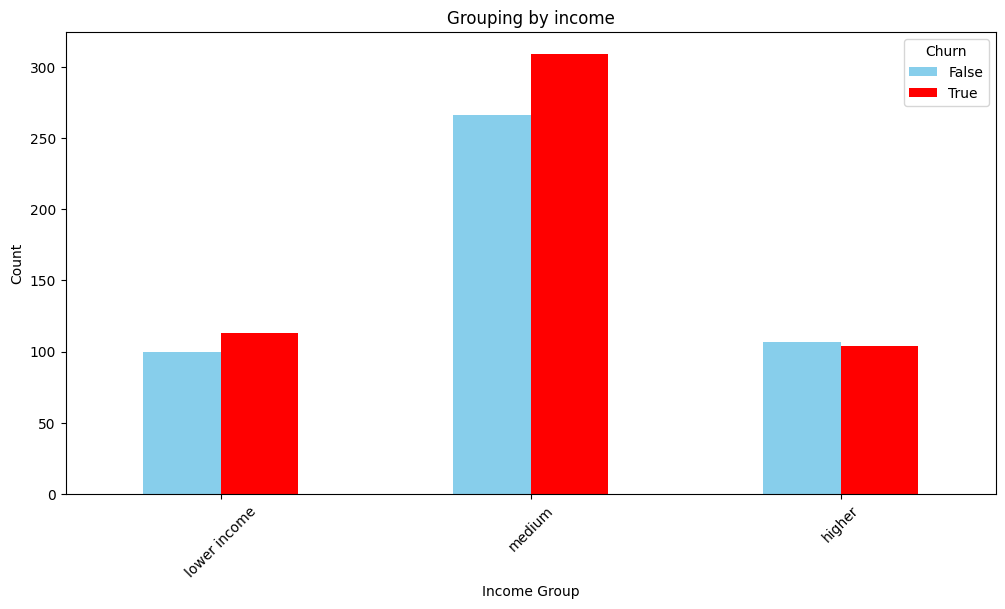

In [20]:
# group by gender
gender_group = df.groupby(["Gender", "Target_Churn"]).size().unstack(fill_value=0)

gender_group.plot(kind="bar", figsize=(12, 6), color=["skyblue", "red"])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Grouping by gender")
plt.legend(title="Churn")
plt.xticks(rotation=45)
plt.show()

# group by age
bins = [0, 30, 50, 100]  
labels = ["0-30", "30-50", "50+"]
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)
age_group = df.groupby(["Age_Group", "Target_Churn"]).size().unstack(fill_value=0)

age_group.plot(kind="bar", figsize=(12, 6), color=["skyblue", "red"])
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Grouping by age")
plt.legend(title="Churn")
plt.xticks(rotation=45)
plt.show()


# display annual income distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["Annual_Income"], bins=10, kde=True, color="blue", edgecolor="black")

plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.title("Distribution of Annual Income")
plt.show()



# group by income
mean_income = df["Annual_Income"].mean()
std_income = df["Annual_Income"].std()
max_income = df["Annual_Income"].max()
bins = [0, mean_income - std_income, mean_income + std_income, max_income]  
labels = ["lower income", "medium", "higher"]
df["Income_Group"] = pd.cut(df["Annual_Income"], bins=bins, labels=labels, right=False)
income_group = df.groupby(["Income_Group", "Target_Churn"]).size().unstack(fill_value=0)

income_group.plot(kind="bar", figsize=(12, 6), color=["skyblue", "red"])
plt.xlabel("Income Group")
plt.ylabel("Count")
plt.title("Grouping by income")
plt.legend(title="Churn")
plt.xticks(rotation=45)
plt.show()